---

### **1. Can we use Bagging for regression problems?**

Yes, Bagging can be used for regression. It combines predictions by averaging the outputs of multiple models.

---

### **2. What is the difference between multiple model training and single model training?**

Single model training uses one model to make predictions. Multiple model training (ensemble) combines several models to improve accuracy and reduce errors.

---

### **3. Explain the concept of feature randomness in Random Forest.**

In Random Forest, a random subset of features is selected at each split in a tree. This increases diversity among trees and reduces overfitting.

---

### **4. What is OOB (Out-of-Bag) Score?**

OOB Score is an internal validation method in Bagging/Random Forest that uses unused bootstrap samples to evaluate model performance.

---

### **5. How can you measure the importance of features in a Random Forest model?**

Feature importance is measured by checking how much each feature reduces impurity (like Gini or entropy) or decreases model error.

---

### **6. Explain the working principle of a Bagging Classifier.**

A Bagging Classifier trains multiple models on different bootstrap samples and combines their predictions using majority voting.

---

### **7. How do you evaluate a Bagging Classifier’s performance?**

It is evaluated using metrics like accuracy, precision, recall, F1-score, or OOB score.

---

### **8. How does a Bagging Regressor work?**

A Bagging Regressor trains multiple models on different bootstrap samples and averages their predictions.

---

### **9. What is the main advantage of ensemble techniques?**

They improve accuracy and reduce overfitting by combining multiple models.

---

### **10. What is the main challenge of ensemble methods?**

They require more computation, time, and memory compared to single models.

---

### **11. Explain the key idea behind ensemble techniques.**

The key idea is that combining multiple weak learners produces a stronger and more accurate model.

---

### **12. What is a Random Forest Classifier?**

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions using majority voting.

---

### **13. What are the main types of ensemble techniques?**

The main types are Bagging, Boosting, and Stacking.

---

### **14. What is ensemble learning in machine learning?**

Ensemble learning is a technique where multiple models are combined to improve overall prediction performance.

---

### **15. When should we avoid using ensemble methods?**

Avoid them when the dataset is very small, when model simplicity is required, or when computational resources are limited.

---

### **16. How does Bagging help in reducing overfitting?**

Bagging reduces overfitting by averaging multiple models, which decreases variance.

---

### **17. Why is Random Forest better than a single Decision Tree?**

Random Forest reduces overfitting and gives more stable and accurate predictions than a single decision tree.

---

### **18. What is the role of bootstrap sampling in Bagging?**

Bootstrap sampling creates different training datasets by sampling with replacement, increasing model diversity.

---

### **19. What are some real-world applications of ensemble techniques?**

Applications include fraud detection, medical diagnosis, stock prediction, recommendation systems, and spam detection.

---

### **20. What is the difference between Bagging and Boosting?**

Bagging trains models independently and reduces variance.
Boosting trains models sequentially and reduces bias by focusing on previous errors.

---



In [1]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
#22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 3237.526541353384


In [3]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Feature Importances:")
for name, score in zip(data.feature_names, model.feature_importances_):
    print(name, ":", score)


Feature Importances:
mean radius : 0.032311888273301004
mean texture : 0.011063901250175845
mean perimeter : 0.060092333477412795
mean area : 0.05381045367561502
mean smoothness : 0.006223358550035776
mean compactness : 0.009215659698391042
mean concavity : 0.08055701642634591
mean concave points : 0.1419344436315119
mean symmetry : 0.003278068988046974
mean fractal dimension : 0.003140276443878005
radius error : 0.016434957577357797
texture error : 0.003171913625550393
perimeter error : 0.011769755537440448
area error : 0.029538418256883636
smoothness error : 0.005880791914760226
compactness error : 0.004596378662668866
concavity error : 0.005815899489496524
concave points error : 0.0033823220710919844
symmetry error : 0.0040007728493448805
fractal dimension error : 0.007134569189458313
worst radius : 0.07797474929691814
worst texture : 0.018785671163890155
worst perimeter : 0.07429212194132524
worst area : 0.11821685833472201
worst smoothness : 0.011769174205977244
worst compactness 

In [4]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

print("RF MSE:", mean_squared_error(y_test, rf.predict(X_test)))
print("DT MSE:", mean_squared_error(y_test, dt.predict(X_test)))

RF MSE: 0.034179532163742685
DT MSE: 0.05847953216374269


In [5]:
# 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.
model = RandomForestClassifier(oob_score=True, bootstrap=True, random_state=42)
model.fit(X_train, y_train)
print("OOB Score:", model.oob_score_)

OOB Score: 0.9547738693467337


In [6]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.
from sklearn.svm import SVC

model = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9415204678362573


In [7]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.
for n in [10, 50, 100]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    print(f"Trees: {n}, Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Trees: 10, Accuracy: 0.9649122807017544
Trees: 50, Accuracy: 0.9707602339181286
Trees: 100, Accuracy: 0.9707602339181286


In [8]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = BaggingClassifier(estimator=LogisticRegression(max_iter=2000), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
print("AUC Score:", roc_auc_score(y_test, y_prob))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC Score: 0.9972075249853027


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# 29. Train a Random Forest Regressor and analyze feature importance scores.
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("Feature Importances:")
for i, score in enumerate(model.feature_importances_):
    print(f"Feature {i}:", score)


Feature Importances:
Feature 0: 0.0016039081044947078
Feature 1: 0.018145565329769336
Feature 2: 0.004037450818063752
Feature 3: 0.004618216730676256
Feature 4: 0.002928485162546705
Feature 5: 0.0013994870148152153
Feature 6: 0.002914947671292822
Feature 7: 0.3876414371618101
Feature 8: 0.0020323393543083368
Feature 9: 0.0033547084186861306
Feature 10: 0.009379180657777385
Feature 11: 0.0025071787111815035
Feature 12: 0.0019892750777769077
Feature 13: 0.015524481048698729
Feature 14: 0.004006753868688566
Feature 15: 0.0011120986456267645
Feature 16: 0.004068442833776752
Feature 17: 0.0019944892416867894
Feature 18: 0.0035134692341821177
Feature 19: 0.005620973452723385
Feature 20: 0.04190977548389972
Feature 21: 0.029699842490275626
Feature 22: 0.12143530351773098
Feature 23: 0.058610279435372024
Feature 24: 0.008784173657613682
Feature 25: 0.001873029430201973
Feature 26: 0.02160409527897716
Feature 27: 0.22910097369119428
Feature 28: 0.004914722623718466
Feature 29: 0.003674915852433

In [10]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
rf = RandomForestClassifier(random_state=42)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Bagging Accuracy:", accuracy_score(y_test, bag.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Bagging Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9707602339181286


In [11]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9428571428571428


In [12]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance.
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

for n in [10, 50, 100]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    print(f"Estimators: {n}, MSE:", mean_squared_error(y_test, model.predict(X_test)))

Estimators: 10, MSE: 3237.526541353384
Estimators: 50, MSE: 2987.0073593984966
Estimators: 100, MSE: 2908.80615037594


In [13]:
# 33. Train a Random Forest Classifier and analyze misclassified samples.
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

misclassified = X_test[y_test != y_pred]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Number of Misclassified Samples:", len(misclassified))

Accuracy: 0.007518796992481203
Number of Misclassified Samples: 132


In [14]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

dt.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))
print("Bagging Accuracy:", accuracy_score(y_test, bag.predict(X_test)))

Decision Tree Accuracy: 0.022556390977443608
Bagging Accuracy: 0.0


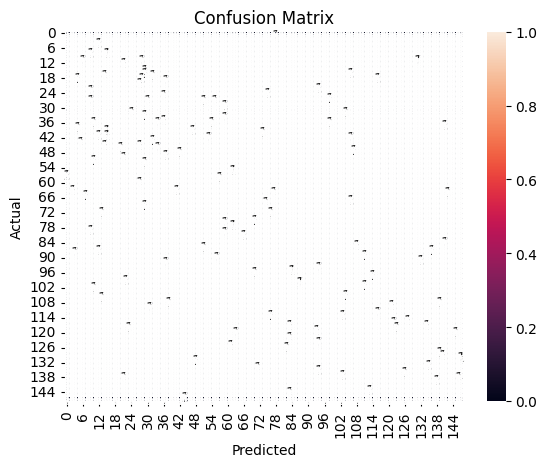

In [15]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)

print("Stacking Accuracy:", accuracy_score(y_test, stack.predict(X_test)))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (175) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (164) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in trainin

Stacking Accuracy: 0.007518796992481203


In [17]:
# 37. Train a Random Forest Classifier and print the top 5 most important features.
import numpy as np

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[-5:]

print("Top 5 Features:")
for i in indices:
    print(f"Feature {i}: {importances[i]}")

Top 5 Features:
Feature 9: 0.1137168135277221
Feature 5: 0.1148857562185353
Feature 3: 0.11583082751370469
Feature 8: 0.12156706607840434
Feature 2: 0.12353823517899985


In [18]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.
from sklearn.metrics import classification_report

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag.fit(X_train, y_train)

y_pred = bag.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        31.0       0.00      0.00      0.00       0.0
        37.0       0.00      0.00      0.00       1.0
        39.0       0.00      0.00      0.00       0.0
        40.0       0.00      0.00      0.00       0.0
        42.0       0.00      0.00      0.00       1.0
        43.0       0.00      0.00      0.00       0.0
        44.0       0.00      0.00      0.00       0.0
        45.0       0.00      0.00      0.00       0.0
        48.0       0.00      0.00      0.00       2.0
        49.0       0.00      0.00      0.00       0.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       3.0
        53.0       0.00      0.00      0.00       1.0
        55.0       0.00      0.00      0.00       0.0
        57.0       0.00      0.00      0.00       0.0
        58.0       0.00      0.00      0.00       0.0
        59.0       0.00      0.00      0.00       1.0
        60.0       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [19]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.
for depth in [None, 5, 10, 20]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    print(f"Max Depth: {depth}, Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Max Depth: None, Accuracy: 0.007518796992481203
Max Depth: 5, Accuracy: 0.007518796992481203
Max Depth: 10, Accuracy: 0.0
Max Depth: 20, Accuracy: 0.007518796992481203


In [20]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.
from sklearn.neighbors import KNeighborsRegressor

models = [
    ("Decision Tree", DecisionTreeRegressor()),
    ("KNN", KNeighborsRegressor())
]

for name, estimator in models:
    bag = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)
    bag.fit(X_train, y_train)
    print(f"{name} MSE:", mean_squared_error(y_test, bag.predict(X_test)))

Decision Tree MSE: 2987.0073593984966
KNN MSE: 3140.186131007519


In [27]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load a binary classification dataset for ROC-AUC calculation
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_prob = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.9968400940623163


In [22]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation.
from sklearn.model_selection import cross_val_score

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
scores = cross_val_score(bag, data.data, data.target, cv=5)

print("Cross-validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Scores: [0.         0.02247191 0.         0.         0.        ]
Mean Accuracy: 0.00449438202247191


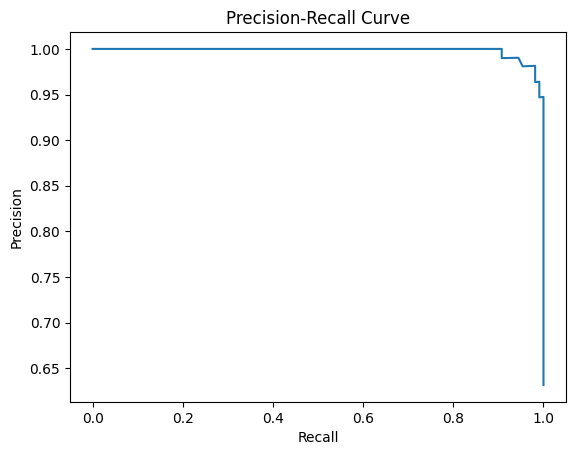

In [26]:
#43. Train a Random Forest Classifier and plot the Precision-Recall curve.
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

# Load a binary classification dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_prob = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [24]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
estimators = [
    ('rf', RandomForestClassifier()),
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)

print("Stacking Accuracy:", accuracy_score(y_test, stack.predict(X_test)))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (175) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (164) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in trainin

Stacking Accuracy: 0.007518796992481203


In [25]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
for sample in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=sample,
        random_state=42
    )
    bag.fit(X_train, y_train)
    print(f"Max Samples: {sample}, MSE:", mean_squared_error(y_test, bag.predict(X_test)))

Max Samples: 0.5, MSE: 2826.9423368421053
Max Samples: 0.7, MSE: 2797.224661654135
Max Samples: 1.0, MSE: 2987.0073593984966
